In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
entree = "01__Pilot_(1).txt" #premier episode de Lost
fichier = open(entree, "r")
lignes = fichier.readlines()
fichier.close()
texte = ""
for ligne in lignes :
    if ligne[0] not in "0123456789":
        texte += ligne

#print(texte)

In [3]:
corpus = [texte]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
dico1 = vectorizer.get_feature_names()
#print(dico1)
#print(X.toarray())
print(len(dico1))

505


In [4]:
#import nltk
#nltk.download('stopwords')

In [5]:
#import nltk
#nltk.download('punkt')

In [6]:
corpus = [texte]
vectorizer = CountVectorizer(stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(corpus)
dico2 = vectorizer.get_feature_names()
nb_occ = X.toarray()[0]

#print(dico2)
#print(X.toarray())
print(len(dico2))

408


En filtrant les mots en utilisant l'ensemble *stopwords.words('english')*, on passe de 505 à 408 mots dans le dictionnaire.

In [7]:
#liste des stop_words rencontres dans le texte
l = []
for mot in dico1 :
    if mot not in dico2:
        l.append(mot)

l

['about',
 'after',
 'again',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'been',
 'but',
 'by',
 'can',
 'couldn',
 'did',
 'didn',
 'do',
 'does',
 'doing',
 'don',
 'down',
 'few',
 'for',
 'from',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'him',
 'how',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'just',
 'll',
 'me',
 'more',
 'my',
 'myself',
 'no',
 'not',
 'now',
 'of',
 'off',
 'on',
 'only',
 'our',
 'out',
 'over',
 're',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'than',
 'that',
 'the',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'why',
 'will',
 'with',
 'wouldn',
 'you',
 'your']

Le mot le plus présent dans le premier épisode de Lost est *"help"*.

In [8]:
m = max(nb_occ)
#[i for i, j in enumerate(nb_occ) if j == m]
nb_occ.argmax()

157

In [9]:
dico2[157]

'help'

#### Les n mots les plus présents dans le premier épisode de Lost

,Word,Nb_occ
0,help,21
1,come,16
2,know,15
3,yeah,14
4,get,13
5,back,11
6,good,11
7,right,10
8,like,9
9,hey,8


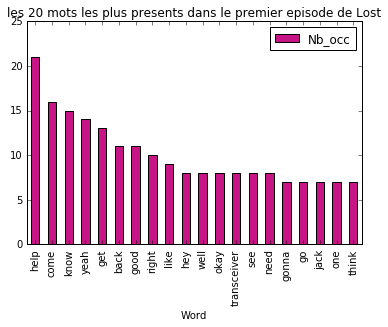

In [10]:
n = 20
ind = np.argpartition(nb_occ, -n)[-n:]
ind = ind[np.argsort(-nb_occ[ind])]
words = [dico2[i] for i in ind]

words_count = []
i = 0
for i in range(len(words)):
    words_count.append(nb_occ[ind[i]])
    
df = pd.DataFrame(np.column_stack([words, words_count]), columns=['Word', 'Nb_occ'])
df.Nb_occ=pd.to_numeric(df.Nb_occ)

titre = "les "+str(n)+" mots les plus presents dans le premier episode de Lost"
hist = df.plot(kind='bar', x='Word', y='Nb_occ', color='mediumvioletred', title =titre).get_figure()
name_fig = titre+'.png'
hist.savefig(name_fig,  bbox_inches="tight")
df